R-squared score: 0.825
Mean squared error: 13825433.181

Feature Importance:
      Feature  Coefficient
2    carwidth   707.374479
3   carheight   200.736860
5  enginesize    80.635393
6  horsepower    56.389191
1   carlength   -40.511314
0   wheelbase   -24.290496
4  curbweight     2.243973


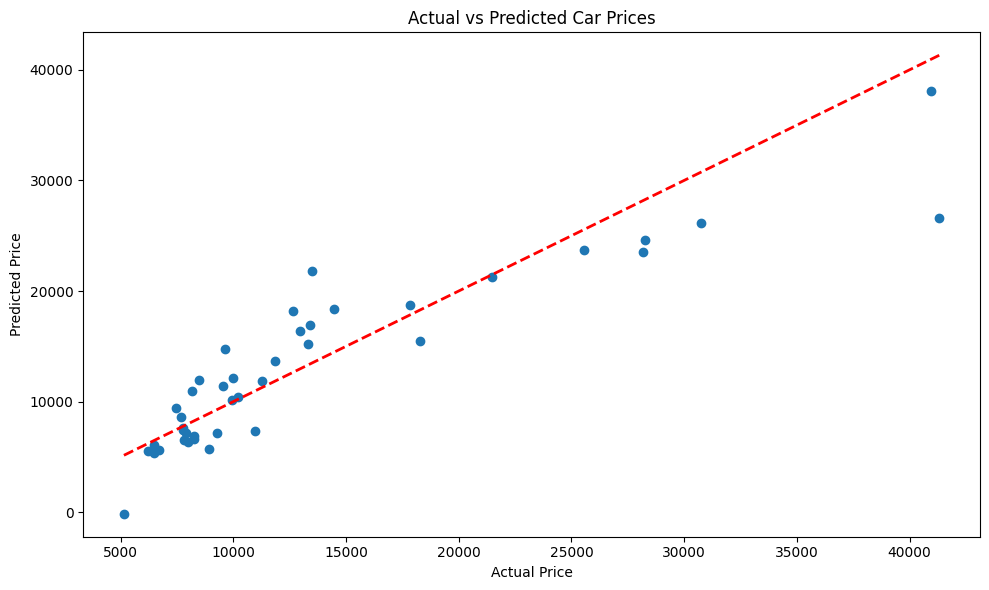

ValueError: x and y must be the same size

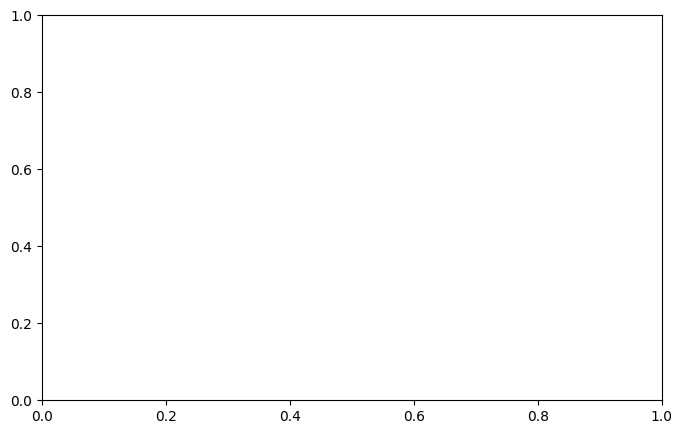

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('CarPrice_Assignment.csv')

X = df[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower']]
y = df['price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared score: {r2:.3f}')
print(f'Mean squared error: {mse:.3f}')
      
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, color='lightcoral', label='Actual Price')
plt.plot(X_train, y_pred_train, color='firebrick', label='Regression Line')
plt.title('Horsepower vs Price (Training Set)')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.legend(loc='best')
plt.box(False)
plt.show()

